In [1]:
# %matplotlib
# %matplotlib inline
import numpy
import matplotlib.pyplot as plt

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
print(sys.path)

['', '/usr/lib/python35.zip', '/usr/lib/python3.5', '/usr/lib/python3.5/plat-x86_64-linux-gnu', '/usr/lib/python3.5/lib-dynload', '/home/Seanebum/.local/lib/python3.5/site-packages', '/usr/local/lib/python3.5/dist-packages', '/usr/lib/python3/dist-packages', '/home/Seanebum/.local/lib/python3.5/site-packages/IPython/extensions', '/home/Seanebum/.ipython', '/mnt/c/Users/seanm/OneDrive/Documents/Research/TauHybrid/GillesPy2']


In [3]:
import math
import gillespy2
from gillespy2.basic_tau_leaping_solver import BasicTauLeapingSolver
from gillespy2.basic_ssa_solver import BasicSSASolver
from gillespy2.basic_ode_solver import BasicODESolver

In [4]:
import gillespy2
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=301)
            B = gillespy2.Species(name='B', initial_value=120)
            C = gillespy2.Species(name='C', initial_value=0)
            D = gillespy2.Species(name='D', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

In [5]:
model = MichaelisMenten()


In [6]:
%time results = model.run(solver=BasicTauLeapingSolver(), show_labels=True)
# import cProfile

# cProfile.run('model.run(solver=BasicTauLeapingSolver(), show_labels=True)', sort='tot')

CPU times: user 172 ms, sys: 0 ns, total: 172 ms
Wall time: 177 ms


In [7]:
%time results2 = model.run(solver=BasicSSASolver(), show_labels=True)

CPU times: user 125 ms, sys: 0 ns, total: 125 ms
Wall time: 134 ms


In [8]:
# cProfile.run('model.run(solver=BasicSSASolver(), show_labels=True, debug=False)', sort='tot')
# %time results2 = model.run(solver=BasicSSASolver(), show_labels=True, profile=True, debug=False)

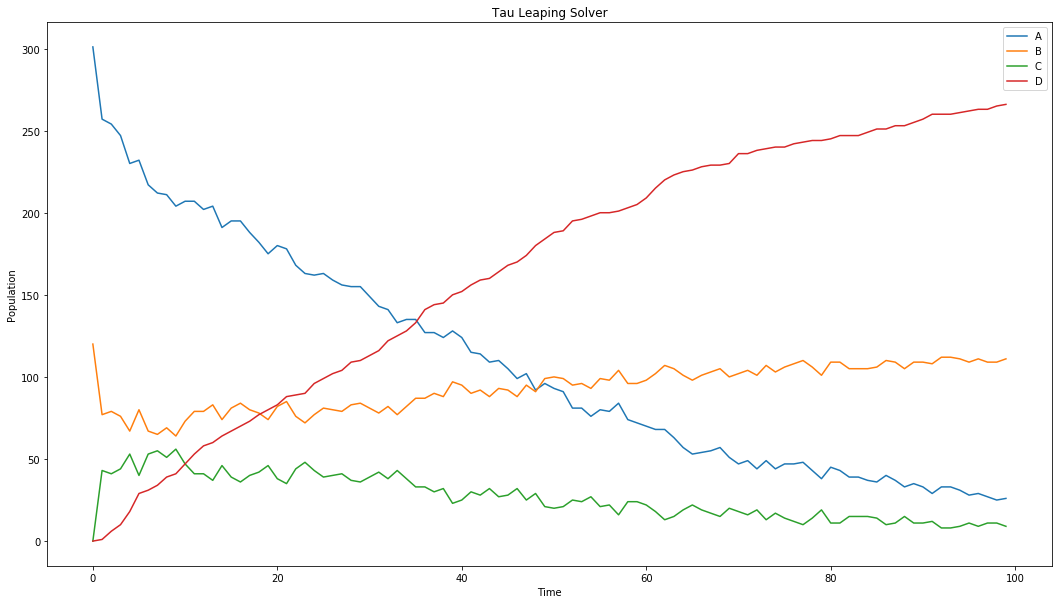

In [9]:
plt.figure(figsize=(18,10))
plt.title("Tau Leaping Solver")
plt.xlabel("Time")
plt.ylabel("Population")
plt.plot(results[0]['time'], results[0]['A'], label='A')
plt.plot(results[0]['time'], results[0]['B'], label='B')
plt.plot(results[0]['time'], results[0]['C'], label='C')
plt.plot(results[0]['time'], results[0]['D'], label='D')
plt.legend(loc='best')


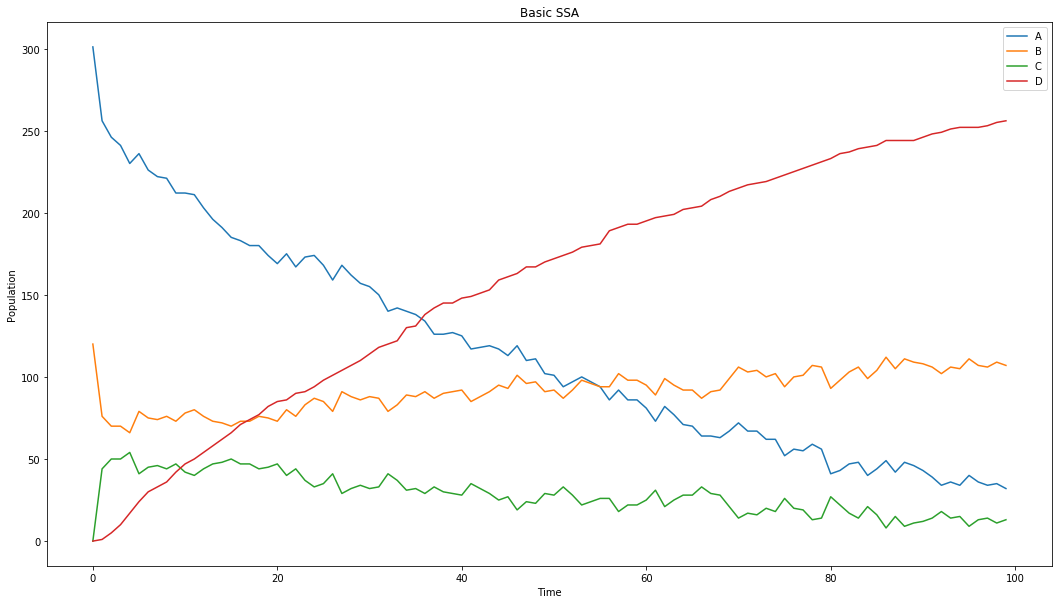

In [10]:
plt.figure(figsize=(18,10))
plt.title("Basic SSA")
plt.xlabel("Time")
plt.ylabel("Population")
plt.plot(results2[0]['time'], results2[0]['A'], label='A')
plt.plot(results2[0]['time'], results2[0]['B'], label='B')
plt.plot(results2[0]['time'], results2[0]['C'], label='C')
plt.plot(results2[0]['time'], results2[0]['D'], label='D')
plt.legend(loc='best')

In [11]:
import tqdm

In [12]:
total_difference = {}
for i in results[0]:
    total_difference[i] = [x - y for x,y in zip(results[0]['A'], results2[0]['A'])]

In [13]:
print(total_difference)

{'time': [0, 1, 8, 6, 0, -4, -9, -10, -10, -8, -5, -4, -1, 8, 0, 10, 12, 8, 2, 1, 11, 3, 1, -10, -12, -5, 0, -12, -7, -2, -6, -7, 1, -9, -5, -3, -7, 1, -2, 1, -1, -2, -4, -10, -7, -8, -20, -8, -19, -6, -8, -3, -16, -19, -21, -14, -7, -8, -12, -14, -11, -5, -14, -14, -14, -17, -10, -9, -6, -16, -25, -18, -23, -13, -18, -5, -9, -7, -16, -18, 4, 0, -8, -9, -3, -8, -9, -5, -15, -11, -10, -10, -1, -3, -3, -12, -7, -7, -10, -6], 'C': [0, 1, 8, 6, 0, -4, -9, -10, -10, -8, -5, -4, -1, 8, 0, 10, 12, 8, 2, 1, 11, 3, 1, -10, -12, -5, 0, -12, -7, -2, -6, -7, 1, -9, -5, -3, -7, 1, -2, 1, -1, -2, -4, -10, -7, -8, -20, -8, -19, -6, -8, -3, -16, -19, -21, -14, -7, -8, -12, -14, -11, -5, -14, -14, -14, -17, -10, -9, -6, -16, -25, -18, -23, -13, -18, -5, -9, -7, -16, -18, 4, 0, -8, -9, -3, -8, -9, -5, -15, -11, -10, -10, -1, -3, -3, -12, -7, -7, -10, -6], 'B': [0, 1, 8, 6, 0, -4, -9, -10, -10, -8, -5, -4, -1, 8, 0, 10, 12, 8, 2, 1, 11, 3, 1, -10, -12, -5, 0, -12, -7, -2, -6, -7, 1, -9, -5, -3, -7, 1, -2

In [14]:
total_sum = 0
total_len = 0
for i in total_difference:
    total_sum += sum(total_difference[i])
    total_len += len(total_difference[i])

In [15]:
average_diff = abs(total_sum / total_len)
print("Average population difference between Tau and SSA simulations: ", average_diff)

Average population difference between Tau and SSA simulations:  6.72


In [16]:
def __get_results(solver, model, number_of_trajectories):
    results = []
    for i in range(number_of_trajectories):
        result = model.run(solver=solver)
        if isinstance(result, dict):
            results.append(result)
        else:
            results.append(result[0])
    return results

In [17]:
def create_distribution(solver, model, number_of_trajectories):
    results = __get_results(solver, model, number_of_trajectories)
    distribution = {}
    for trajectory in results:
        for species in trajectory.keys():
            if species == 'time': continue;
            distribution[species] = []
            for timestep in range(len(trajectory[species])):
                distribution[species].append([])
    trajectory_number = 0
    for trajectory in results:
        for species in trajectory.keys():
            if species == 'time': continue;
            for timestep in range(len(trajectory[species])):
                distribution[species][timestep].append(trajectory[species][timestep])
            
    return distribution    

In [18]:
def get_stats(solver, standard_results, model, number_of_trajectories):
    interior_stats = {}
    test_results = create_distribution(solver, model, number_of_trajectories)          
    for species in test_results:
        interior_stats[species] = []
    for species in test_results:
        for timestep, value in enumerate(test_results[species]):
            interior_stats[species].append(stats.ks_2samp(value, standard_results[species][timestep]))
    return interior_stats

In [19]:
standard_results = create_distribution(BasicSSASolver(), model, 100)

In [20]:
from scipy import stats
ks_stats = get_stats(BasicTauLeapingSolver(), standard_results, model, 100)

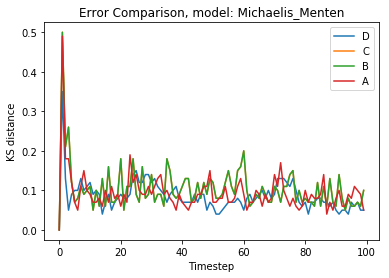

In [21]:
plt.title("Error Comparison, model: " + model.name)
plt.xlabel("Timestep")
#plt.ylabel("P-Value")
plt.ylabel("KS distance")
for species in ks_stats:
    if species == 'time': continue           
    result = ks_stats[species][:]
    timesteps = []
    p_values = []
    for timestep, value in enumerate(result):
        timesteps.append(timestep)
        ks, pv = value
        p_values.append(ks)
    plt.plot(timesteps, p_values, label='{0}'.format(species))
plt.legend(loc='best')